In [1]:
# Importamos las librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

In [2]:
# Definimos la ruta para trabajar
os.chdir("C:/Users/Abigail y Jason/Desktop/DATA SCIENCE\
/Análisis y visualización de datos/Tarea_4")

In [3]:
# importamos nuestro primer archivo para analizar
empleo = pd.read_csv("empleo.csv", encoding="latin-1")
# importamos un segundo archivo para analizar
exportaciones = pd.read_csv("exportaciones.csv", encoding="latin-1")
# con .rename cambiamos el nombre de las columnas, para utilizarlas más fácil
empleo.rename(columns={"anio":"año"}, inplace = True)
exportaciones.rename(columns={"anio":"año", "value":"cantidad_de_exp"}, inplace = True)
# utilizamos pd.merge para de ambos archivos crear un sólo dataframe
emp_exp = pd.merge(left= empleo, right= exportaciones, on= ("provincia","año"), how="inner")
# limpiamos los datos dañados
emp_exp["cantidad_de_exp"] = emp_exp["cantidad_de_exp"].replace("-", np.nan).astype(float)
# verificamos los datos
emp_exp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17280 entries, 0 to 17279
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   provincia                    17280 non-null  object 
 1   año                          17280 non-null  int64  
 2   mes                          17280 non-null  object 
 3   empleados_registrados_miles  17280 non-null  float64
 4   rubro                        17280 non-null  object 
 5   cantidad_de_exp              17112 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 810.1+ KB


In [4]:
# creamos un diccionario para solucionar las fechas
meses_español = {
    "ene":"01","feb":"02","mar":"03","abr":"04",
    "may":"05","jun":"06","jul":"07","ago":"08",
    "sep":"09","oct":"10","nov":"11","dic":"12"
}
# nos aseguramos que cumplan con el diccionario
emp_exp["mes"] = emp_exp["mes"].str.lower()
# creamos una función que aplique el diccionario
def convertir_fecha(fecha_str):
    mes, año = fecha_str.split('-')
    mes_numero = meses_español[mes]
    return pd.to_datetime("20"+año+" "+mes_numero)
# lo aplicamos
emp_exp["fecha"] = emp_exp["mes"].apply(convertir_fecha)
# creamos una función que distribuya las provincias en regiones
def definir_zona (x):
        if x in ("Jujuy","Salta","Catamarca","Tucuman",
         "Santiago del Estero","Chaco","Formosa",
         "Corrientes","Misiones"):
              return "Región del Norte Grande Argentino"
        elif x in ("La Rioja","San Juan",
           "San Luis", "Mendoza"):
              return "Región del Nuevo Cuyo"
        elif x in ("Córdoba","Santa Fe", "Entre Ríos"):
               return "Región Centro"
        elif x in ("Buenos Aires","Capital Federal"):
               return "Capital"
        else:
               return "Región Patagónica"
# lo aplicamos
emp_exp["region"] = emp_exp["provincia"].apply(definir_zona)
# verificamos nuestros datos
emp_exp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17280 entries, 0 to 17279
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   provincia                    17280 non-null  object        
 1   año                          17280 non-null  int64         
 2   mes                          17280 non-null  object        
 3   empleados_registrados_miles  17280 non-null  float64       
 4   rubro                        17280 non-null  object        
 5   cantidad_de_exp              17112 non-null  float64       
 6   fecha                        17280 non-null  datetime64[ns]
 7   region                       17280 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 1.1+ MB


# Hipótesis 1:
<i>En el Región Patagónica de Argentina (extremo sur)
hay una mayor cantidad de empleados registrados a lo largo de los años (2009-2020)
que en la Región del Norte Grande Argentino (extremo norte)<i/>
> Región Patagónica compuesta por: "La Pampa", "Neuquén", "Río Negro",\
"Chubut", "Santa Cruz" y "Tierra del Fuego".\
> Región del Norte Grande Argentino cuempuesto por: "Catamarca", "Tucumán",\
"Corrientes", "Misiones", "Santiago del Estero", "Chaco", "Salta", "Jujuy" y "Formosa".\
[>Referencia<](https://es.wikipedia.org/wiki/Regiones_para_el_desarrollo_econ%C3%B3mico_y_social)

In [5]:
# creamos una variable que resuma los datos de interés para comprobar la hipótesis
res1 = emp_exp.groupby(["fecha","region"])["empleados_registrados_miles"].sum().reset_index()
# aplicamos un filtro para visualizar espcíficamente los datos que indican la hipótesis
res1 = res1.loc[res1["region"].isin(["Región Patagónica", "Región del Norte Grande Argentino"])]
# comprobamos nuestra tabla resumen
res1.value_counts()

fecha       region                             empleados_registrados_miles
2009-01-01  Región Patagónica                  2712.220                       1
            Región del Norte Grande Argentino  2242.565                       1
2017-03-01  Región Patagónica                  3063.310                       1
2017-02-01  Región del Norte Grande Argentino  2704.525                       1
            Región Patagónica                  3057.020                       1
                                                                             ..
2012-12-01  Región del Norte Grande Argentino  2529.425                       1
            Región Patagónica                  2893.765                       1
2012-11-01  Región del Norte Grande Argentino  2547.635                       1
            Región Patagónica                  2896.475                       1
2020-12-01  Región del Norte Grande Argentino  2538.685                       1
Name: count, Length: 288, dtype: int64

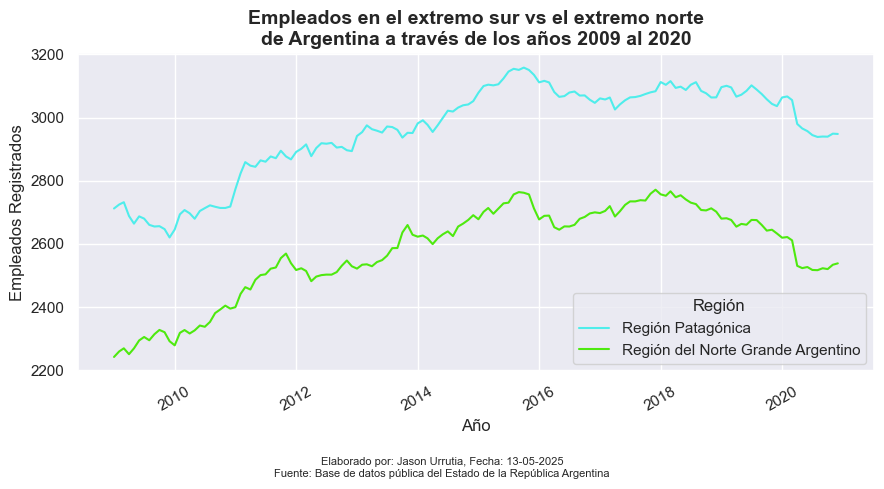

In [6]:
# Le damos tamaño a la figura
plt.figure(figsize=(9,5))
# establecemos un estilo
sns.set(style="darkgrid")
# creamos un gráfico de lineas
sns.lineplot(data=res1,
            x="fecha",
            y="empleados_registrados_miles",
            hue="region",
            palette=["#4FEDEB", "#4EE90F"]
            )
# título y etiquetas
plt.title("Empleados en el extremo sur vs el extremo norte\n\
de Argentina a través de los años 2009 al 2020", fontsize = 14,
          fontweight = "bold")
plt.suptitle("Elaborado por: Jason Urrutia, Fecha: 13-05-2025\n"\
"Fuente: Base de datos pública del Estado de la República Argentina"
,fontsize=8, y=-0.01)
plt.ylabel("Empleados Registrados")
plt.xlabel("Año")
plt.legend(title="Región")
plt.xticks(rotation=30)
plt.grid(True)
plt.tight_layout()
#generamos el gráfico
plt.show()

# Conclusión:
<i>Efectivamente, la línea de color celeste que representa el extremo sur de Argentina a lo largo de los años se encuentra siempre por sobre la línea color verde que representa el extremo norte, por lo tanto, nos indica que el extremo sur siempre ha tenido mayor cantidad de empleados registrados que el extremo norte, esto es curioso considerando que al extremo sur le componen solamente 6 provincias mientras tanto que al extremo norte le componen 9 provincias, uno pensaría que debiese ser al revés, pero esta es la magia de hacer un análisis, que nos puede mostrar respuestas que quizás no esperábamos, por otra parte, estos resultados hablan bien de la Región Patagónica que con 3 provincias menos muestra una mejor empleabilidad, y nos da resultados menos alentadores en cuanto a la Región del Norte Grande Argentino.<i/>


# Hipótesis 2:
<i>En la Región Patagónica (extremo sur) se exporta más combustibles y energías a lo largo de los años (2009-2020) que en la Región del Norte Grande Argentino (extremo norte).<i/>

In [7]:
# creamos un nuevo resumen que agrupe los datos de interés para comprobar la hipótesis
res2 = emp_exp.groupby(["año","region","rubro"])["cantidad_de_exp"].sum().reset_index()
# aplicamos un filtro con .isin para seleccionar las regiones de interés
res2 = res2.loc[res2["region"].isin(["Región Patagónica", "Región del Norte Grande Argentino"])]
# aplicamos un nuevo filtro que sólamente nos muestre el rubro de interés
res2 = res2[res2["rubro"]== "Combustibles y energía"]

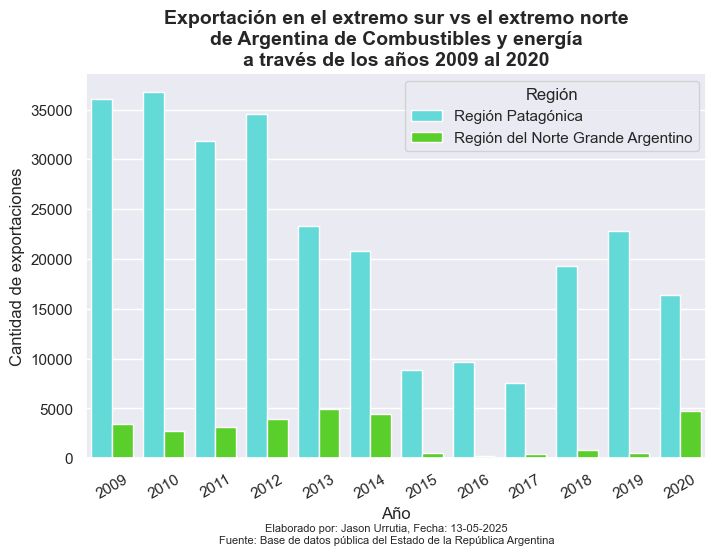

In [8]:
# damos tamaño a la figura
plt.figure(figsize=(8,5))
# creamos un gráfico de barras
sns.barplot(
    data=res2,
    x="año",
    y="cantidad_de_exp",
    hue="region",
    palette=["#4FEDEB", "#4EE90F"]
    )
# títulos y etiquetas
plt.title("Exportación en el extremo sur vs el extremo norte\n\
de Argentina de Combustibles y energía\n\
a través de los años 2009 al 2020", fontsize = 14,
          fontweight = "bold")
plt.suptitle("Elaborado por: Jason Urrutia, Fecha: 13-05-2025\n"\
"Fuente: Base de datos pública del Estado de la República Argentina"
,fontsize=8, y=-0.02)
plt.ylabel("Cantidad de exportaciones")
plt.xlabel("Año")
plt.legend(title="Región")
plt.xticks(rotation=30)
# generamos el gráfico
plt.show()

# Conclusión:
<i>Notablemente la Región Patagónica (vista en una barra de color celeste) exporta muchos mas combustibles y energías que la Región del Norte Grande Argentino (vista en una barra de color verde), estos resultados nos muestran que existe mayor cantidad de estos recursos en el extremo sur que permiten su exportación y a su vez nos muestra la deficiencia de los mismos en el extremo norte, es una información bastante  importante sobre todo si pretendemos instalarnos a hacer negocios en este país, ya que con algunos datos podemos concluir este tipo de cosas, y es que a pesar de que podemos observar que en algunos años las exportaciones del extremo sur son mas altas y bajas, aún así tiene un tremendo potencial en el mundo de los combustibles y las energías.<i/>


# Hipótesis 3:
<i> En la Capital se exporta menor cantidad de Manufacturas de Origen Agropecuario 
a lo largo de los años (2009-2020) en relación a sus afueras, es decir, a la Región Centro.<i/>
>Capital compuesta por: "Buenos Aires" y "Capital Federal\
>Región Centro compuesta por: "Córdoba","Santa Fe" y "Entre Ríos"


In [9]:
# Creamos una variable que agrupe nuestros datos para comprobar la hipótesis
res3 = emp_exp.groupby(["año","rubro","region"])["cantidad_de_exp"].sum().reset_index()
# aplicamos un filtro para dejar los datos que nos interesan
res3 = res3.loc[res3["region"].isin(["Región Centro","Capital"])]
# volvemos a hacer un filtro para sólo seleccionar un rubro específico
res3 = res3[res3["rubro"]== "Manufacturas de origen agropecuario"]

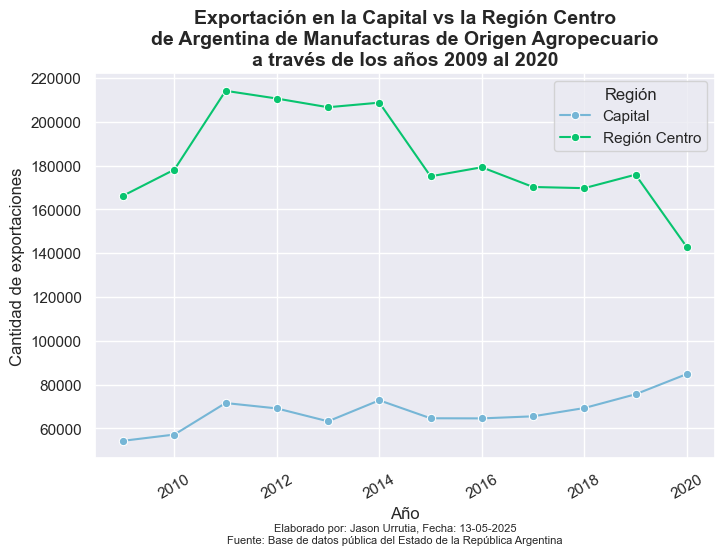

In [10]:
# Tamaño de la figura
plt.figure(figsize=(8,5))
# elegimos un gráfico de lineas
sns.lineplot(data=res3,
             x="año",
             y="cantidad_de_exp",
             hue="region",
             marker="o",
             palette=["#76B6D6","#08C46F"])
# títulos y etiquetas
plt.title("Exportación en la Capital vs la Región Centro\n\
de Argentina de Manufacturas de Origen Agropecuario\n\
a través de los años 2009 al 2020", fontsize = 14,
          fontweight = "bold")
plt.suptitle("Elaborado por: Jason Urrutia, Fecha: 13-05-2025\n"\
"Fuente: Base de datos pública del Estado de la República Argentina"
,fontsize=8, y=-0.02)
plt.ylabel("Cantidad de exportaciones")
plt.xlabel("Año")
plt.legend(title="Región")
plt.xticks(rotation=30)
# visualizamos el gráfico
plt.show()

# Conclusión:
<i>La exportación de manufacturas de origen agropecuario ha sido mucho mayor en la Región Centro (mostrada en una línea de color verde oscuro) que en la Capital (mostrada en una línea de color azul) a través de los años, lo que nos brinda un indicio en cuanto a este rubro, sobre qué sector del país es el dominante y, por ende, más atractivo en términos comerciantes y es que a pesar de que podríamos decir que la línea verde oscura va bajando en los últimos años a partir del 2014 al 2020, y por el contrario la línea azul va subiendo muy poquito desde el 2015 al 2020, podemos de igual forma entender que la Región Centro se encuentra en superioridad en este ámbito en cuanto a la Capital del país, lo que nos abre la posibilidad de aprovechar esta información situando a la Región Centro como una región a tener en cuenta si se busca invertir en manufacturas de origen agropecuario.<i/>


# Hipótesis 4 (Incomprobable):
<i>Se visualiza una caída de las exportaciones de manufacturas de origen agropecuario
en la Región Centro, esto se debe a las sequías que han afectado a la región y que ha hecho
disminuir la producción de este sector ecónomico.<i/>
> Lamentablemente, esta hipótesis no es posible comprobarla con los datos que disponemos, puesto que si bien podemos comprobar la caída de las exportaciones que indica (ver Hipótesis 3), no contamos con datos que nos ayuden a visualizar o entender las razones o motivos de dicha disminución, mucho menos, con datos meteorológicos que nos confirmen, que además, la causa se deba específicamente a alguna sequía que se haya presentado en la región, en síntesis, desconocemos si esta hipótesis es correcta.


# Conclusión final:
<i>En base a estas hipótesis que hemos visto, nos podemos hacer nuevas ideas respecto a situaciones socioeconómicas de Argentina, ideas que pueden derivar en decisiones y decisiones que pueden terminar en un proyecto exitoso. Todo esto para que podamos comprender lo valioso que puede llegar a ser el análisis y la visualización de los datos, no son simples dibujitos o líneas trazadas al azar, todo esto es traducible, y estas traducciones nos aportan un valor que prácticamente no tiene límites.<i/>
